In [174]:
import numpy as np
import timecorr as tc
import seaborn as sns
import os
import glob as glob
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import gridspec
from scipy.stats import wishart
import hypertools as hyp
from scipy.spatial.distance import cdist
%matplotlib inline


In [175]:
LEGEND_SIZE = 12
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=LEGEND_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 

In [176]:
#results_dir = os.path.join(os.getenv('HOME'), 'Desktop', 'timecorr_env', 'timecorr_paper', 'pieman', 'results', 'higher_order_sims')
results_dir = os.path.join('../../data/', 'results', 'higher_order_sims')

In [177]:
figdir = '../figs'
if not os.path.isdir(figdir):
    os.mkdir(figdir)

In [178]:
conds = ['constant', 'random', 'ramping', 'block']

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


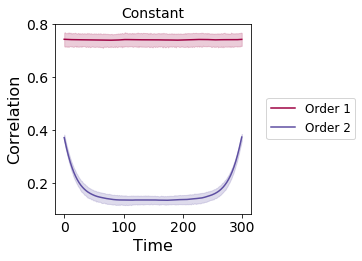

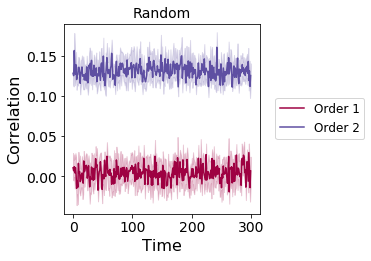

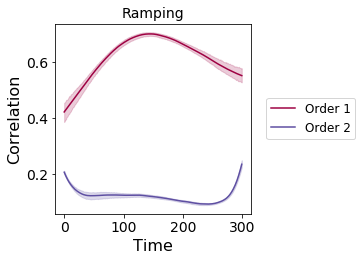

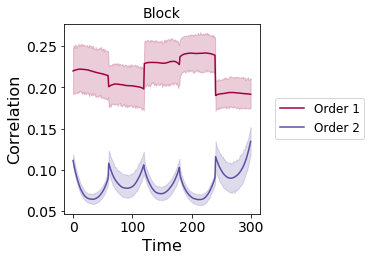

In [45]:
for cond in conds:
    result_cond = os.path.join(results_dir, cond)

    recovery_performance_all = pd.DataFrame()
    for e, r in enumerate(glob.glob(os.path.join(result_cond, '*'))):

        recovery_performance_all = recovery_performance_all.append(pd.read_csv(r))
        recovery_performance_all['iteration'] = int(e)


    melted = pd.melt(recovery_performance_all, id_vars=['time'], value_vars=['1', '2'])
    melted = melted.astype({"variable": int})
    plt.figure(figsize=(3.5,3.5))
    ax = sns.lineplot(x="time", y="value", hue='variable', palette = 'Spectral', data=melted)
    ax.set(xlabel='Time', ylabel='Correlation', title=cond.capitalize())
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1, handles=handles[2:], labels=['Order 1', 'Order 2'])

    plt.gcf().savefig(os.path.join(figdir, 'high_order_sim_' + cond + '.pdf'), bbox_inches='tight')


In [179]:
results_dir = os.path.join('../../data/', 'results', 'higher_order_sims_search')

In [181]:
result_cond = os.path.join(results_dir, cond + '_*')

1
5
2
6
3
7


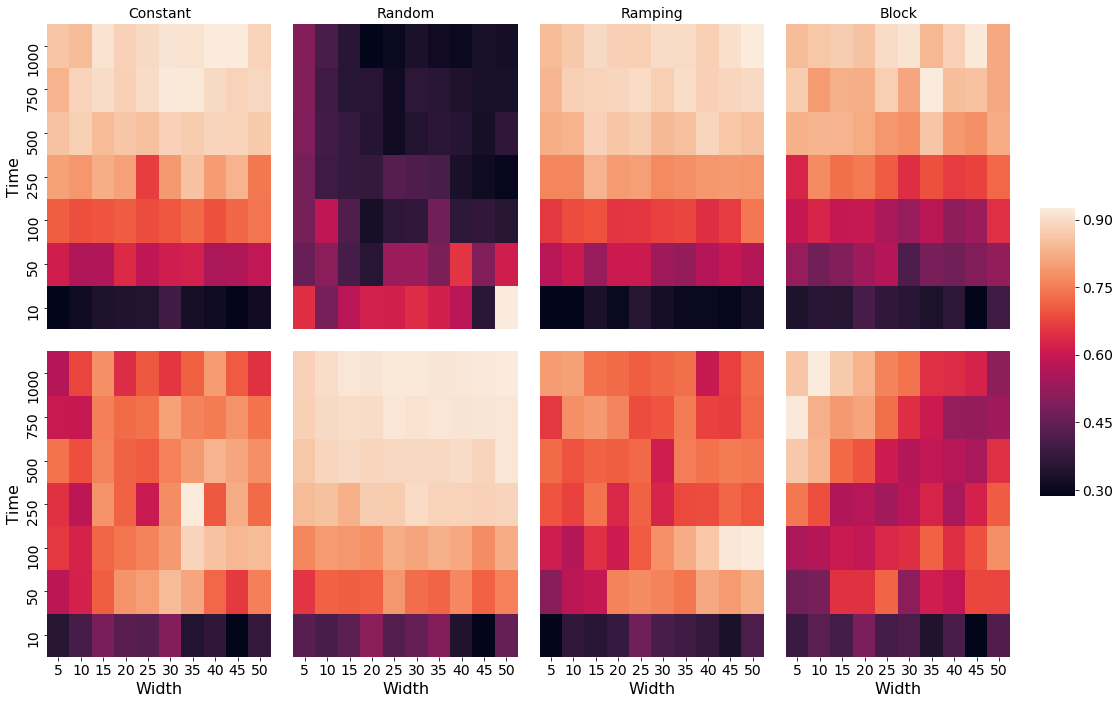

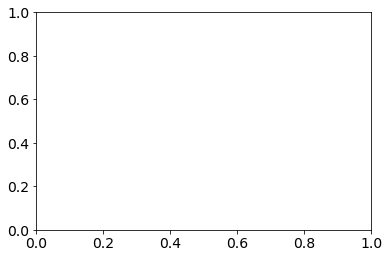

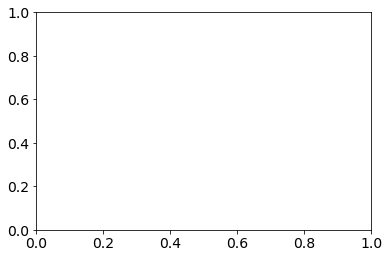

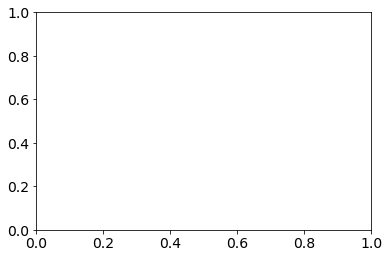

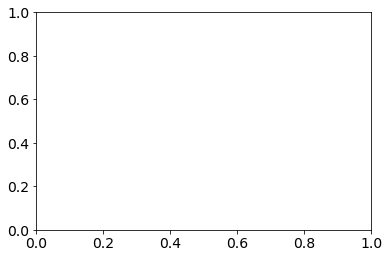

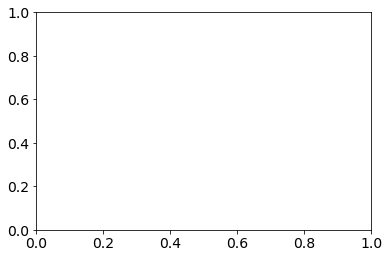

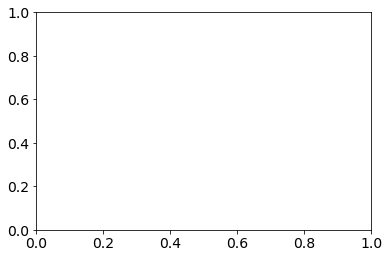

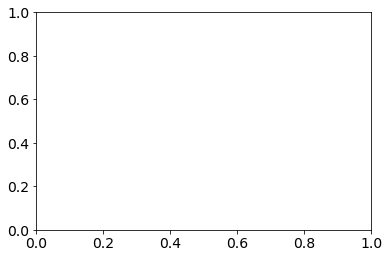

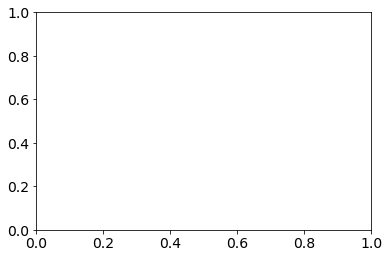

In [235]:
fig, axn = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(16,10))

cbar_ax = fig.add_axes([.91, .3, .03, .4])

for i, ax in enumerate(axn.flat):   
    
    if i % 2 ==0:
        
        ci = int(i / 2)
        
        cond = conds[ci]
    
        result_cond = os.path.join(results_dir, cond + '_*')

        recovery_performance_all = pd.DataFrame()
        for e, r in enumerate(glob.glob(os.path.join(result_cond, '*'))):
            recovery_performance_part = pd.read_csv(r)
            split_it = r.split('/')[-1].split('.')[0]
            split_string = r.split('/')[-2].split('_')
            recovery_performance_part['iteration'] = int(split_it)
            recovery_performance_part['Time'] = int(split_string[1])
            recovery_performance_part['features'] = int(split_string[2])
            recovery_performance_part['Width'] = int(split_string[3])
            recovery_performance_all = recovery_performance_all.append(recovery_performance_part)

        melted = pd.melt(recovery_performance_all, id_vars=['Time', 'Width'], value_vars=['1', '2'])
        melted = melted.astype({"variable": int})
    
        
        for order in [1, 2]:
            
            axi = ci
            
            if order == 2:
                axi = ci + 4
            
            plt.figure()
            df = melted[melted['variable']==order]
            heatmap_data = pd.pivot_table(df, values='value', index=['Time'], columns='Width')
            g = sns.heatmap(heatmap_data, ax=axn.flat[axi], cbar=axi == 0, cbar_ax=None if axi else cbar_ax)
            axn.flat[axi].invert_yaxis()
            
            if order == 1:
                axn.flat[axi].title.set_text(cond.capitalize())
                axn.flat[axi].axes.get_xaxis().set_visible(False)
                
            if not axi in [0, 4]:
                print(axi)
                axn.flat[axi].axes.get_yaxis().set_visible(False)
                
            plt.yticks(rotation=0) 
        


fig.tight_layout(rect=[0, 0, .9, 1])

plt.gcf().savefig(os.path.join(figdir, 'sim_heatmaps.pdf'), bbox_inches='tight')


#plt.plot()


